### This script contains the following:

#### 1. Importing libraries
#### 2. Importing Data
#### 3. Cleaning Data
#### 4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.
#### 5. State your hypothesis in a markdown cell within your Jupyter notebook.
#### 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
#### 7. Split the data into two sets: a training set and a test set.

#### 8.Run a linear regression on the data.
##### 8.1 First, fit the model you created to the training set.
##### 8.2 Then, create a prediction for y on the test set

#### 9. Create a plot that shows the regression line on the test set.
#### 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.
#### 11. Check the model performance statistics—MSE and R2 score.
#### 12. Compare the predicted y values with the actual y values in a dataframe.
#### 13. Include your thoughts on how well the model performed on the test set in a markdown cell

### 1. Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs created show up below designated code
%matplotlib inline

### 2. Importing Data

In [5]:
# make path variable
path = r'C:\Users\justi\Downloads\2024AirbnbAmsterdam'

In [6]:
# import Amsterdam listings dataset, ensure "index_col=0" removes the "Unnamed:0 index column", and address memory usage concerns with "low_memory= False"
df = pd.read_csv(os.path.join(path, 'listings_checked2.csv'), index_col = 0, low_memory= False)

### 3. Cleaning Data

In [7]:
df.columns

Index(['caption', 'host_id', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'amenities',
       'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'cancellation_policy', 'first_review',
       'last_review', 'is_apartment', 'color'],
      dtype='object')

In [8]:
df.describe()

,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,2.002400e+04,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000
mean,4.868320e+07,0.158310,6.106272,52.365211,4.888980,2.891930,1.137110,1.444517,152.207052,1.469087,11.318767,3.329055,631.133440,21.561027,82.358819,0.239612
std,5.649750e+07,0.365041,30.389998,0.015997,0.035564,1.318866,0.794223,0.885954,145.840414,0.937993,22.154658,12.539263,541.347045,43.243456,32.667745,0.426858
min,3.159000e+03,0.000000,0.000000,52.288378,4.753247,1.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,8.091616e+06,0.000000,1.000000,52.355127,4.863615,2.000000,1.000000,1.000000,96.000000,1.000000,0.000000,2.000000,21.000000,3.000000,90.000000,0.000000
50%,2.369337e+07,0.000000,1.000000,52.364589,4.886394,2.000000,1.000000,1.000000,125.000000,1.000000,0.000000,2.000000,1125.000000,8.000000,96.000000,0.000000
75%,6.827379e+07,0.000000,1.000000,52.375072,4.908283,4.000000,1.000000,2.000000,175.000000,2.000000,20.000000,3.000000,1125.000000,22.000000,99.000000,0.000000
max,2.293612e+08,1.000000,698.000000,52.424713,5.027689,17.000000,100.500000,12.000000,8500.000000,16.000000,280.000000,1001.000000,9999.000000,695.000000,100.000000,1.000000


In [13]:
# Filtering the data for apartments labeled as "green" (Within 1 mile from Dam Square)
apartments_green = df[(df['property_type'] == 'Apartment') & (df['color'] == 'green')]

In [14]:
apartments_green

,caption,host_id,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,first_review,last_review,is_apartment,color
id,,,,,,,,,,,,,,,,,,,,,
25428,Lovely apt in City Centre (Jordaan),56142,0,2,Centrum-West,52.373114,4.883668,Apartment,Entire home/apt,3,...,14,60,1,100,0,strict_14_with_grace_period,1/21/2018,1/21/2018,Apartment,green
28871,Comfortable double room,124245,1,3,Centrum-West,52.367187,4.890918,Apartment,Private room,2,...,2,1825,215,97,0,moderate,8/22/2010,12/3/2018,Apartment,green
29051,Comfortable single room,124245,1,3,Centrum-West,52.367725,4.891512,Apartment,Private room,1,...,2,730,383,95,0,moderate,3/16/2011,12/5/2018,Apartment,green
41125,Amsterdam Center Entire Apartment,178515,0,1,Centrum-West,52.378915,4.883205,Apartment,Entire home/apt,2,...,3,21,76,95,0,moderate,11/25/2010,10/7/2018,Apartment,green
44129,Luxury design with canal view,187728,1,11,Centrum-West,52.380711,4.886104,Apartment,Entire home/apt,3,...,2,1125,176,98,0,strict_14_with_grace_period,8/16/2010,10/1/2018,Apartment,green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30551479,Amsterdam Apartment in City Centre,151566094,0,1,Centrum-West,52.375609,4.894486,Apartment,Entire home/apt,4,...,1,1125,0,0,1,flexible,NaN,NaN,Apartment,green
30556050,Amsterdam Downtown- West,22701985,1,1,De Baarsjes - Oud-West,52.363157,4.875763,Apartment,Entire home/apt,4,...,3,1125,0,0,0,strict_14_with_grace_period,NaN,NaN,Apartment,green
30556993,Cheap Cozy Balcony Apartment Jordaan District,229109698,0,1,Centrum-West,52.370966,4.882705,Apartment,Entire home/apt,4,...,3,1125,0,0,1,strict_14_with_grace_period,NaN,NaN,Apartment,green


In [15]:
# Calculating the Interquartile Range (IQR) for the 'price'
Q1 = apartments_green['price'].quantile(0.25)
Q3 = apartments_green['price'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
# Filtering out the outliers from the data
apartments_filtered = apartments_green[(apartments_green['price'] >= lower_bound) & (apartments_green['price'] <= upper_bound)]

In [17]:
# Identifying the outliers line items
outliers = apartments_green[(apartments_green['price'] < lower_bound) | (apartments_green['price'] > upper_bound)]

In [18]:
# Displaying the number of rows before filtering outliers, after filtering outliers, and specified line items of the outliers
initial_count = len(apartments_green)
filtered_count = len(apartments_filtered)

print(f"Initial listings: {initial_count} apartments labeled as 'green.'")
print(f"Listings after outlier removal: {filtered_count} apartments.")
print(outliers)

Initial listings: 3679 apartments labeled as 'green.'
Listings after outlier removal: 3422 apartments.
                                                    caption    host_id  \
id                                                                       
48076                    Amsterdam Central and lot of space     219080   
245927    Sonnenberg - Canal side & view - Most central ...    1005087   
507598                   Canal View Apartment! Jordaan Area    2501656   
1079362                    Central large & modern apartment    5936488   
1233749                       Amsterdam Stay Apartment 1571     329249   
...                                                     ...        ...   
30221647                                   President suites  117151599   
30286344            Lovely Two floor apartment for 3 people   70014679   
30356862     Luxury Penthouse with view on the Royal Palace   23824257   
30495375        90 sqm Jordaan apartment with roof terrace!   10698721   
30498473 

In [19]:
# 257/ 3679 = ~7% are outliers.
# Since I am price conscious and it is not a significant amount of data compared the remainder 3422 options, remove the outliers by using 'apartments_filtered' subset moving forward
apartments_filtered 

,caption,host_id,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,first_review,last_review,is_apartment,color
id,,,,,,,,,,,,,,,,,,,,,
25428,Lovely apt in City Centre (Jordaan),56142,0,2,Centrum-West,52.373114,4.883668,Apartment,Entire home/apt,3,...,14,60,1,100,0,strict_14_with_grace_period,1/21/2018,1/21/2018,Apartment,green
28871,Comfortable double room,124245,1,3,Centrum-West,52.367187,4.890918,Apartment,Private room,2,...,2,1825,215,97,0,moderate,8/22/2010,12/3/2018,Apartment,green
29051,Comfortable single room,124245,1,3,Centrum-West,52.367725,4.891512,Apartment,Private room,1,...,2,730,383,95,0,moderate,3/16/2011,12/5/2018,Apartment,green
41125,Amsterdam Center Entire Apartment,178515,0,1,Centrum-West,52.378915,4.883205,Apartment,Entire home/apt,2,...,3,21,76,95,0,moderate,11/25/2010,10/7/2018,Apartment,green
44129,Luxury design with canal view,187728,1,11,Centrum-West,52.380711,4.886104,Apartment,Entire home/apt,3,...,2,1125,176,98,0,strict_14_with_grace_period,8/16/2010,10/1/2018,Apartment,green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30551479,Amsterdam Apartment in City Centre,151566094,0,1,Centrum-West,52.375609,4.894486,Apartment,Entire home/apt,4,...,1,1125,0,0,1,flexible,NaN,NaN,Apartment,green
30556050,Amsterdam Downtown- West,22701985,1,1,De Baarsjes - Oud-West,52.363157,4.875763,Apartment,Entire home/apt,4,...,3,1125,0,0,0,strict_14_with_grace_period,NaN,NaN,Apartment,green
30556993,Cheap Cozy Balcony Apartment Jordaan District,229109698,0,1,Centrum-West,52.370966,4.882705,Apartment,Entire home/apt,4,...,3,1125,0,0,1,strict_14_with_grace_period,NaN,NaN,Apartment,green


In [20]:
# Check for missing values
apartments_filtered.isnull().sum()

caption                     8
host_id                     0
host_is_superhost           0
host_listings_count         0
neighbourhood_cleansed      0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
review_scores_rating        0
instant_bookable            0
cancellation_policy         0
first_review              345
last_review               345
is_apartment                0
color                       0
dtype: int64

In [21]:
# Find rows where 'first_review' or 'last_review' are missing
missing_reviews = apartments_filtered[apartments_filtered['first_review'].isna() | apartments_filtered['last_review'].isna()]

In [22]:
# Display the rows with missing 'first_review' or 'last_review' data
print(missing_reviews)

                                                caption    host_id  \
id                                                                   
626872                    Beautiful Apartment Amsterdam    3111814   
1003865             Newly Renov Elegant apt in Old West      56142   
1127128   Bright and cozy apartment in trendy district!    6179713   
1147324      City Centre full apartment minimal 20 days    6289853   
1971204          AMSTERDAM APARTMENT (CENTRAL LOCATION)    8317919   
...                                                 ...        ...   
30551479             Amsterdam Apartment in City Centre  151566094   
30556050                       Amsterdam Downtown- West   22701985   
30556993  Cheap Cozy Balcony Apartment Jordaan District  229109698   
30563877     Large comfortable apartments in the center  228749822   
30573892                     Clean and perfect location  229361236   

          host_is_superhost  host_listings_count  neighbourhood_cleansed  \
id           

In [23]:
apartments_filtered['price'].mean()

154.64026884862653

In [24]:
missing_reviews['price'].mean()

151.15072463768115

#### 8 captions missing is ok; the host must be using the platform for the first time
#### missing_reviews['price'].mean() shows me the 345 listings don't have reviews are trying to be competitive average price ~151/night vs. ~154/night
#### KEEP THESE LINE ITEMS TO REVIEW IN BELOW SCATTERPLOT

### 4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

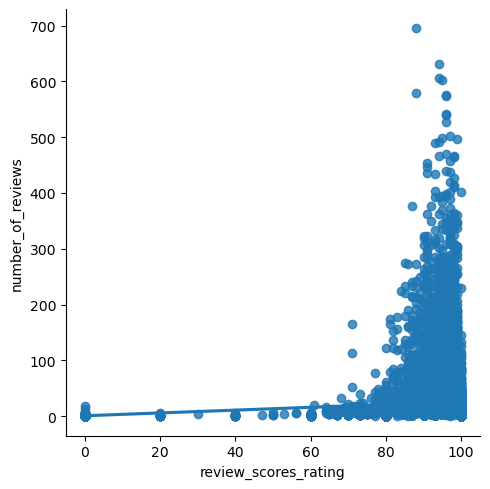

In [31]:
# Create scatterplot using matplotlib testing "review_scores_rating" vs "number_of_reviews"
scatterplot = sns.lmplot(data=df, x="review_scores_rating", y="number_of_reviews")

In [29]:
# Save scatterplot image
scatterplot.figure.savefig(os.path.join(path, 'scatterplot_nights_price.png'))

### 5. State your hypothesis in a markdown cell within your Jupyter notebook.

#### If apartment gets a review score above 80, it has over 200 reviews posted.

### 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [32]:
# Label x as "review_scores_rating" and y as "number of reviews"
x = df['review_scores_rating'].values.reshape(-1,1)
y = df['number_of_reviews'].values.reshape(-1,1)

In [33]:
x

array([[97],
       [96],
       [87],
       ...,
       [ 0],
       [ 0],
       [ 0]], dtype=int64)

In [34]:
y

array([[248],
       [ 42],
       [233],
       ...,
       [  0],
       [  0],
       [  0]], dtype=int64)

### 7. Split the data into two sets: a training set and a test set.

In [35]:
# "x_train, "y_train" are the training set; "x_test", "y_test" is the test set (use later to see if my understanding was correct)
# "test_size=0.3" means 30% should go into the test set, and remaining 70% should go into the training set.
# random_state=0 ensures same split and compare results under the same conditions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### 8.Run a linear regression on the data.
#### 8.1 First, fit the model you created to the training set.

In [37]:
# create linear regression object
regression = LinearRegression()

# fit regression to training set
regression.fit(x_train, y_train)

y_predicted_train = regression.predict(x_train)

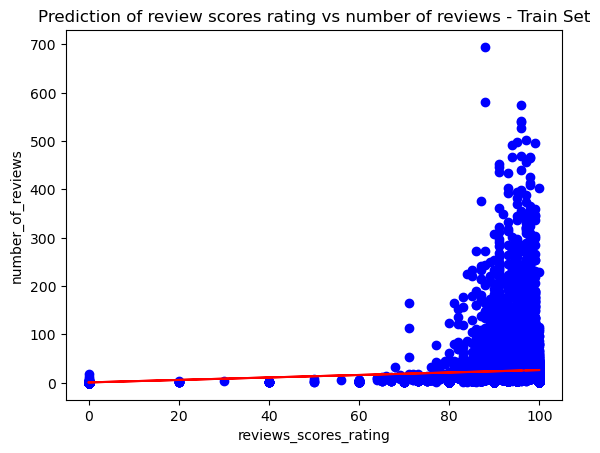

In [38]:
# Visualized the training set results
plot_train = plt
plot_train.scatter(x_train, y_train, color='blue')
plot_train.plot(x_train, y_predicted_train, color='red')
plot_train.title('Prediction of review scores rating vs number of reviews - Train Set')
plot_train.xlabel('reviews_scores_rating')
plot_train.ylabel('number_of_reviews')
plot_train.show()

#### 8.2 Then, create a prediction for y on the test set

In [39]:
y_predicted_test = regression.predict(x_test)

### 9. Create a plot that shows the regression line on the test set

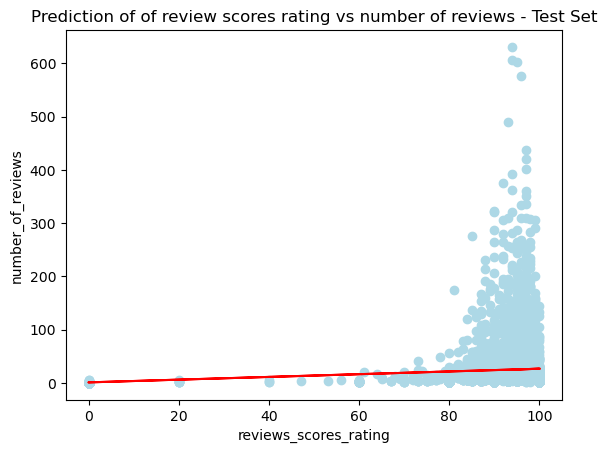

In [40]:
# Visualized the test set results
plot_test = plt
plot_test.scatter(x_test, y_test, color='lightblue')
plot_test.plot(x_test, y_predicted_test, color='red')
plot_test.title('Prediction of of review scores rating vs number of reviews - Test Set')
plot_test.xlabel('reviews_scores_rating')
plot_test.ylabel('number_of_reviews')
plot_test.show()

### 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

#### The train and test set looks very similar to original scatterplot. The line has a slight increasing slope, but overall relatively flat.

### 11. Check the model performance statistics—MSE and R2 score.

In [41]:
# Mean Squared Error (MSE): look at the differences between what actually happened vs what model predicted by (1) squaring these differences to avoid negative numbers canceling each other out and (2) then averaging them.
# Gives idea of how much model’s predictions are, on average, off from the real values.
# R2 score (R2): measure of how well model’s predictions match up with the actual data. 1=perfect, 0=no better than guessing
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[0.25649865]]
Mean squared error:  1853.5249572961918
R2 score:  0.03660578352715116


In [43]:
# Conduct MSE and R2 again for "y_test"
rmse2 = mean_squared_error(y_test, y_predicted_test)
r22 = r2_score(y_test, y_predicted_test)

In [44]:
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r22)

Slope:  [[0.25649865]]
Mean squared error:  1682.1713998088887
R2 score:  0.03498051216781961


### 12. Compare the predicted y values with the actual y values in a dataframe.

In [45]:
# Create dataframe comparing actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted_test.flatten()})
data.head(20)

,Actual,Predicted
0,16,25.114650
1,1,26.397143
2,20,25.114650
3,3,24.601653
4,11,26.397143
5,3,26.397143
6,0,0.747278
7,41,25.114650
8,34,25.627647
9,4,24.601653


### 13. Include your thoughts on how well the model performed on the test set in a markdown cell.

#### The model's performance on the test set is not good as it produced a high RMSE and low R2 score. 
#### The model's predictions are rather far from actual values; it doesn't explain much of the variance in the data. 
#### There is room for improvement in the model's training or the data used. 